In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers, models

In [2]:
# Set the path to your training and validation data directories
train_data_dir = 'D:/Kampus/Sem7/TA/Code/aksara/training'
val_data_dir = 'D:/Kampus/Sem7/TA/Code/aksara/validation'

In [3]:
# Set the image size, batch size, and number of classes
image_size = (224, 224)
batch_size = 8
num_classes = 20

In [4]:
# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

# Create a generator for training data from a directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Create an ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for validation data from a directory
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1600 images belonging to 20 classes.
Found 200 images belonging to 20 classes.


In [5]:
# Load the ResNet50 model pre-trained on ImageNet data (excluding the top dense layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your custom classification head on top of the ResNet base
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
model = models.Model(inputs=base_model.input, outputs=predictions)

In [6]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [7]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/30
200/200 [==============================] - 577s 3s/step - loss: 1.6960 - accuracy: 0.4819 - val_loss: 3.7862 - val_accuracy: 0.0500
Epoch 2/30
200/200 [==============================] - 556s 3s/step - loss: 0.4768 - accuracy: 0.8556 - val_loss: 3.3427 - val_accuracy: 0.0450
Epoch 3/30
200/200 [==============================] - 495s 2s/step - loss: 0.2574 - accuracy: 0.9206 - val_loss: 2.5620 - val_accuracy: 0.2650
Epoch 4/30
200/200 [==============================] - 513s 3s/step - loss: 0.1394 - accuracy: 0.9613 - val_loss: 0.7183 - val_accuracy: 0.8000
Epoch 5/30
200/200 [==============================] - 556s 3s/step - loss: 0.0946 - accuracy: 0.9731 - val_loss: 0.4720 - val_accuracy: 0.8500
Epoch 6/30
200/200 [==============================] - 566s 3s/step - loss: 0.1169 - accuracy: 0.9688 - val_loss: 0.3655 - val_accuracy: 0.9050
Epoch 7/30
200/200 [==============================] - 550s 3s/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.2028 - val_accuracy: 0.9550

Text(0.5, 1.0, 'Training and validation loss')

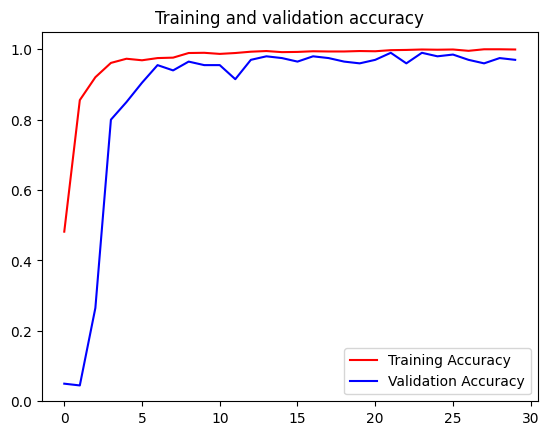

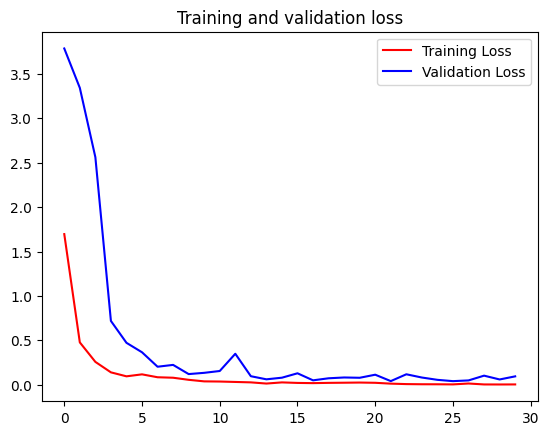

In [8]:
# PLOT LOSS AND ACCURACY
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.ylim(0,1.05)
plt.legend() 
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")

plt.legend()
plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [9]:
from PIL import Image
import numpy as np
import os

def load_and_preprocess_images(main_folder, target_size=(224, 224)):
    images = []
    label = []
    i = 0
    for folder in main_folder:
        file_paths = os.listdir(folder)
        for file_path in file_paths:
            tempo = os.path.join(folder, file_path)
            image = Image.open(tempo)
            image = image.resize(target_size)
            image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
            images.append(image)
            label.append(i)
        i += 1
    print("pass")
    return np.array(images), label

# Example usage:
test_file_paths = ["D:/Kampus/Sem7/TA/Code/aksara/testing/01_Ha","D:/Kampus/Sem7/TA/Code/aksara/testing/02_Na",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/03_Ca","D:/Kampus/Sem7/TA/Code/aksara/testing/04_Ra",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/05_Ka","D:/Kampus/Sem7/TA/Code/aksara/testing/06_Da",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/07_Ta","D:/Kampus/Sem7/TA/Code/aksara/testing/08_Sa",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/09_Wa","D:/Kampus/Sem7/TA/Code/aksara/testing/10_La",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/11_Pa","D:/Kampus/Sem7/TA/Code/aksara/testing/12_Dha",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/13_Ja","D:/Kampus/Sem7/TA/Code/aksara/testing/14_Ya",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/15_Nya","D:/Kampus/Sem7/TA/Code/aksara/testing/16_Ma",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/17_Ga","D:/Kampus/Sem7/TA/Code/aksara/testing/18_Ba",
                    "D:/Kampus/Sem7/TA/Code/aksara/testing/19_Tha","D:/Kampus/Sem7/TA/Code/aksara/testing/20_Nga"
                    ]

test_images, test_label = load_and_preprocess_images(test_file_paths)

pass


In [10]:
predictions = model.predict(test_images)

7/7 [==============================] - 15s 2s/step


In [11]:
accuracy = np.mean(np.argmax(predictions, axis=1) == test_label)
print(f"Accuracy: {accuracy}")

Accuracy: 0.99


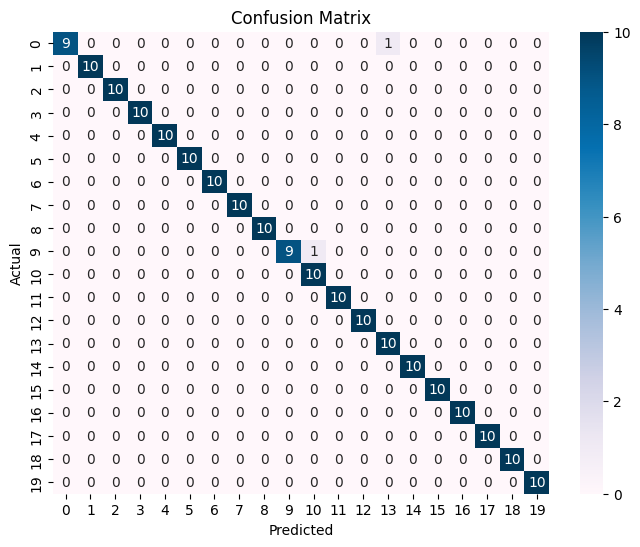


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      0.90      0.95        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.91      1.00      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
  

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_label, np.argmax(predictions, axis=1))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", xticklabels=range(20), yticklabels=range(20))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display additional metrics (accuracy, precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(test_label, np.argmax(predictions, axis=1)))